In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target

In [9]:
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
2,4.7,3.2,1.3,0.2,0
148,6.2,3.4,5.4,2.3,2
66,5.6,3.0,4.5,1.5,1
134,6.1,2.6,5.6,1.4,2


In [10]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [11]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [12]:
setosa_df = df[df.target==0]
versicolor_df = df[df.target==1]
virginica_df = df[df.target==2]

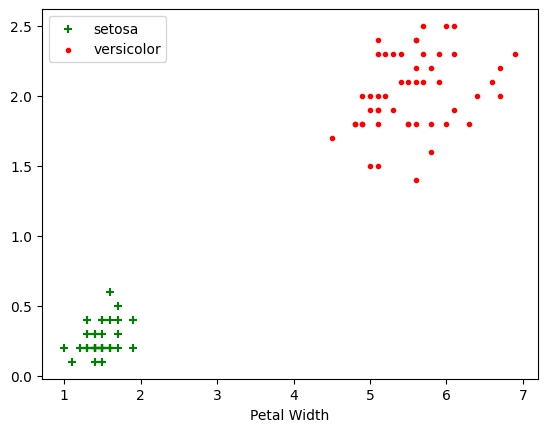

In [13]:
plt.xlabel('Petal Length')
plt.xlabel('Petal Width')
plt.scatter(setosa_df['petal length (cm)'],setosa_df['petal width (cm)'],color='green',marker='+',label='setosa')
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='_',label='virginica')
plt.scatter(virginica_df['petal length (cm)'],virginica_df['petal width (cm)'],color='red',marker='.',label='versicolor')
plt.legend()

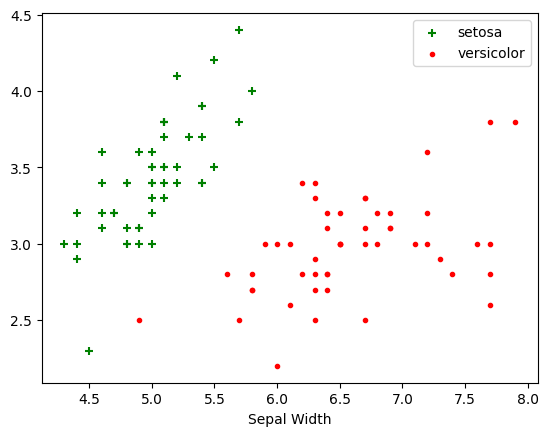

In [14]:
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')
plt.scatter(setosa_df['sepal length (cm)'],setosa_df['sepal width (cm)'],color='green',marker='+',label='setosa')
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='_',label='virginica')
plt.scatter(virginica_df['sepal length (cm)'],virginica_df['sepal width (cm)'],color='red',marker='.',label='versicolor')
plt.legend()

In [15]:
X = df.drop(['target','flower_name'],axis='columns')

In [16]:
y = df.target

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
X.shape,X_train.shape

((150, 4), (120, 4))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [20]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [21]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
y_pred = knn.predict(X_test)

In [24]:
knn.score(X_test,y_test)

0.9666666666666667

In [25]:
y_lr_pred = lr_model.predict(X_test)
lr_model.score(X_test,y_test)

0.9666666666666667

In [26]:
iris.target_names[0]

'setosa'

In [50]:
iris.target_names[knn.predict(X_test[:1])[0]]

'setosa'

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

Text(58.222222222222214, 0.5, 'Truth')

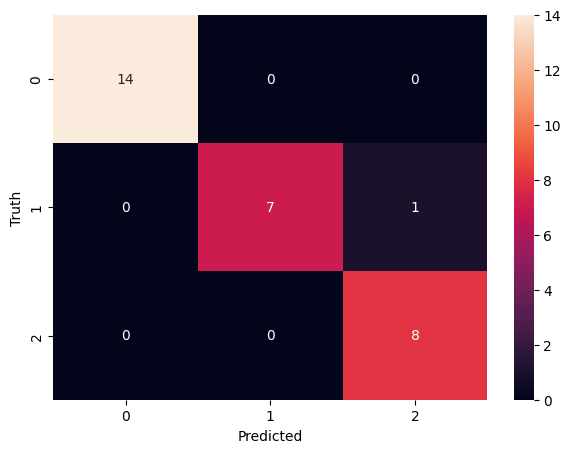

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

